In [1]:
from qiskit import *
%matplotlib inline

In [2]:
from qiskit.tools.visualization import plot_histogram

In [36]:
secretnumber = '0000001000101'

In [21]:
# encode the secrete number into a quantum circuit
circuit = QuantumCircuit(6+1, 6)

In [22]:
circuit.h([0, 1, 2, 3, 4, 5])
circuit.x(6)
circuit.h(6)

In [23]:
circuit.barrier()

In [24]:
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)

circuit.barrier()

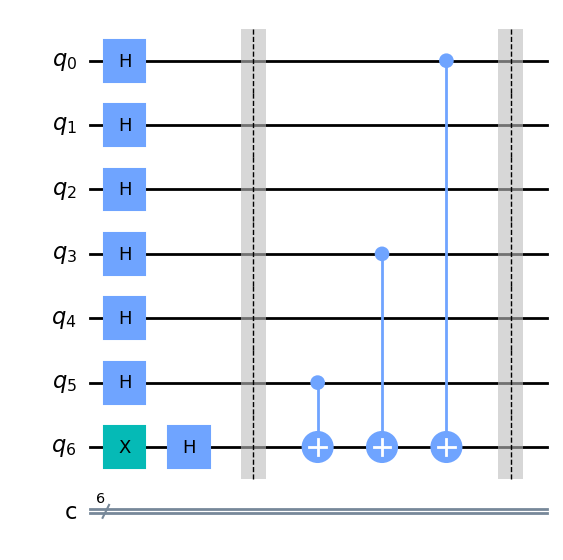

In [25]:
circuit.draw(output='mpl')

In [26]:
circuit.h([0, 1, 2, 3, 4, 5])

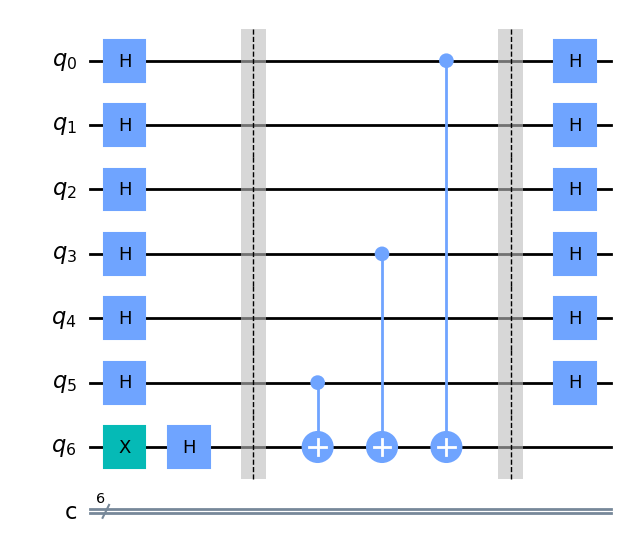

In [28]:
circuit.draw(output='mpl')

In [29]:
circuit.barrier()
circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

In [31]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [37]:
# generize the code for arbitrary secret number
# initialize the registers and the circuit
digits = len(secretnumber)
circuit = QuantumCircuit(digits + 1, digits)
circuit.h(range(digits))
circuit.x(digits)
circuit.h(digits)
circuit.barrier()
# encode the number
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, digits)

circuit.barrier()
circuit.h(range(digits))

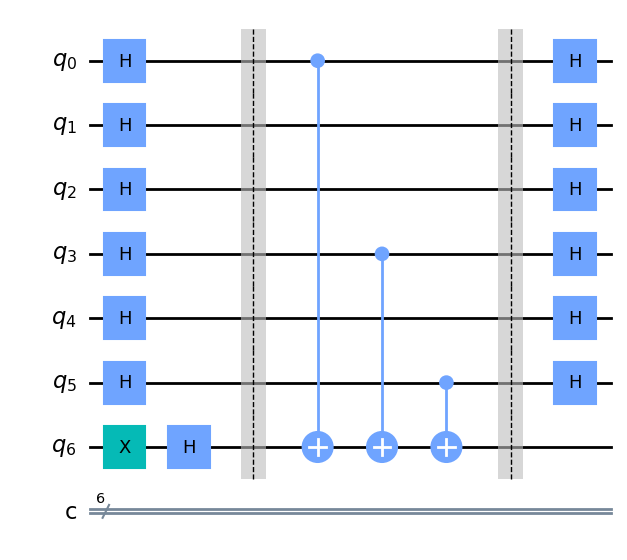

In [33]:
circuit.draw(output='mpl')

In [38]:
circuit.barrier()
circuit.measure(range(digits), range(digits))

In [39]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'0000001000101': 1}
